In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile, Path
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

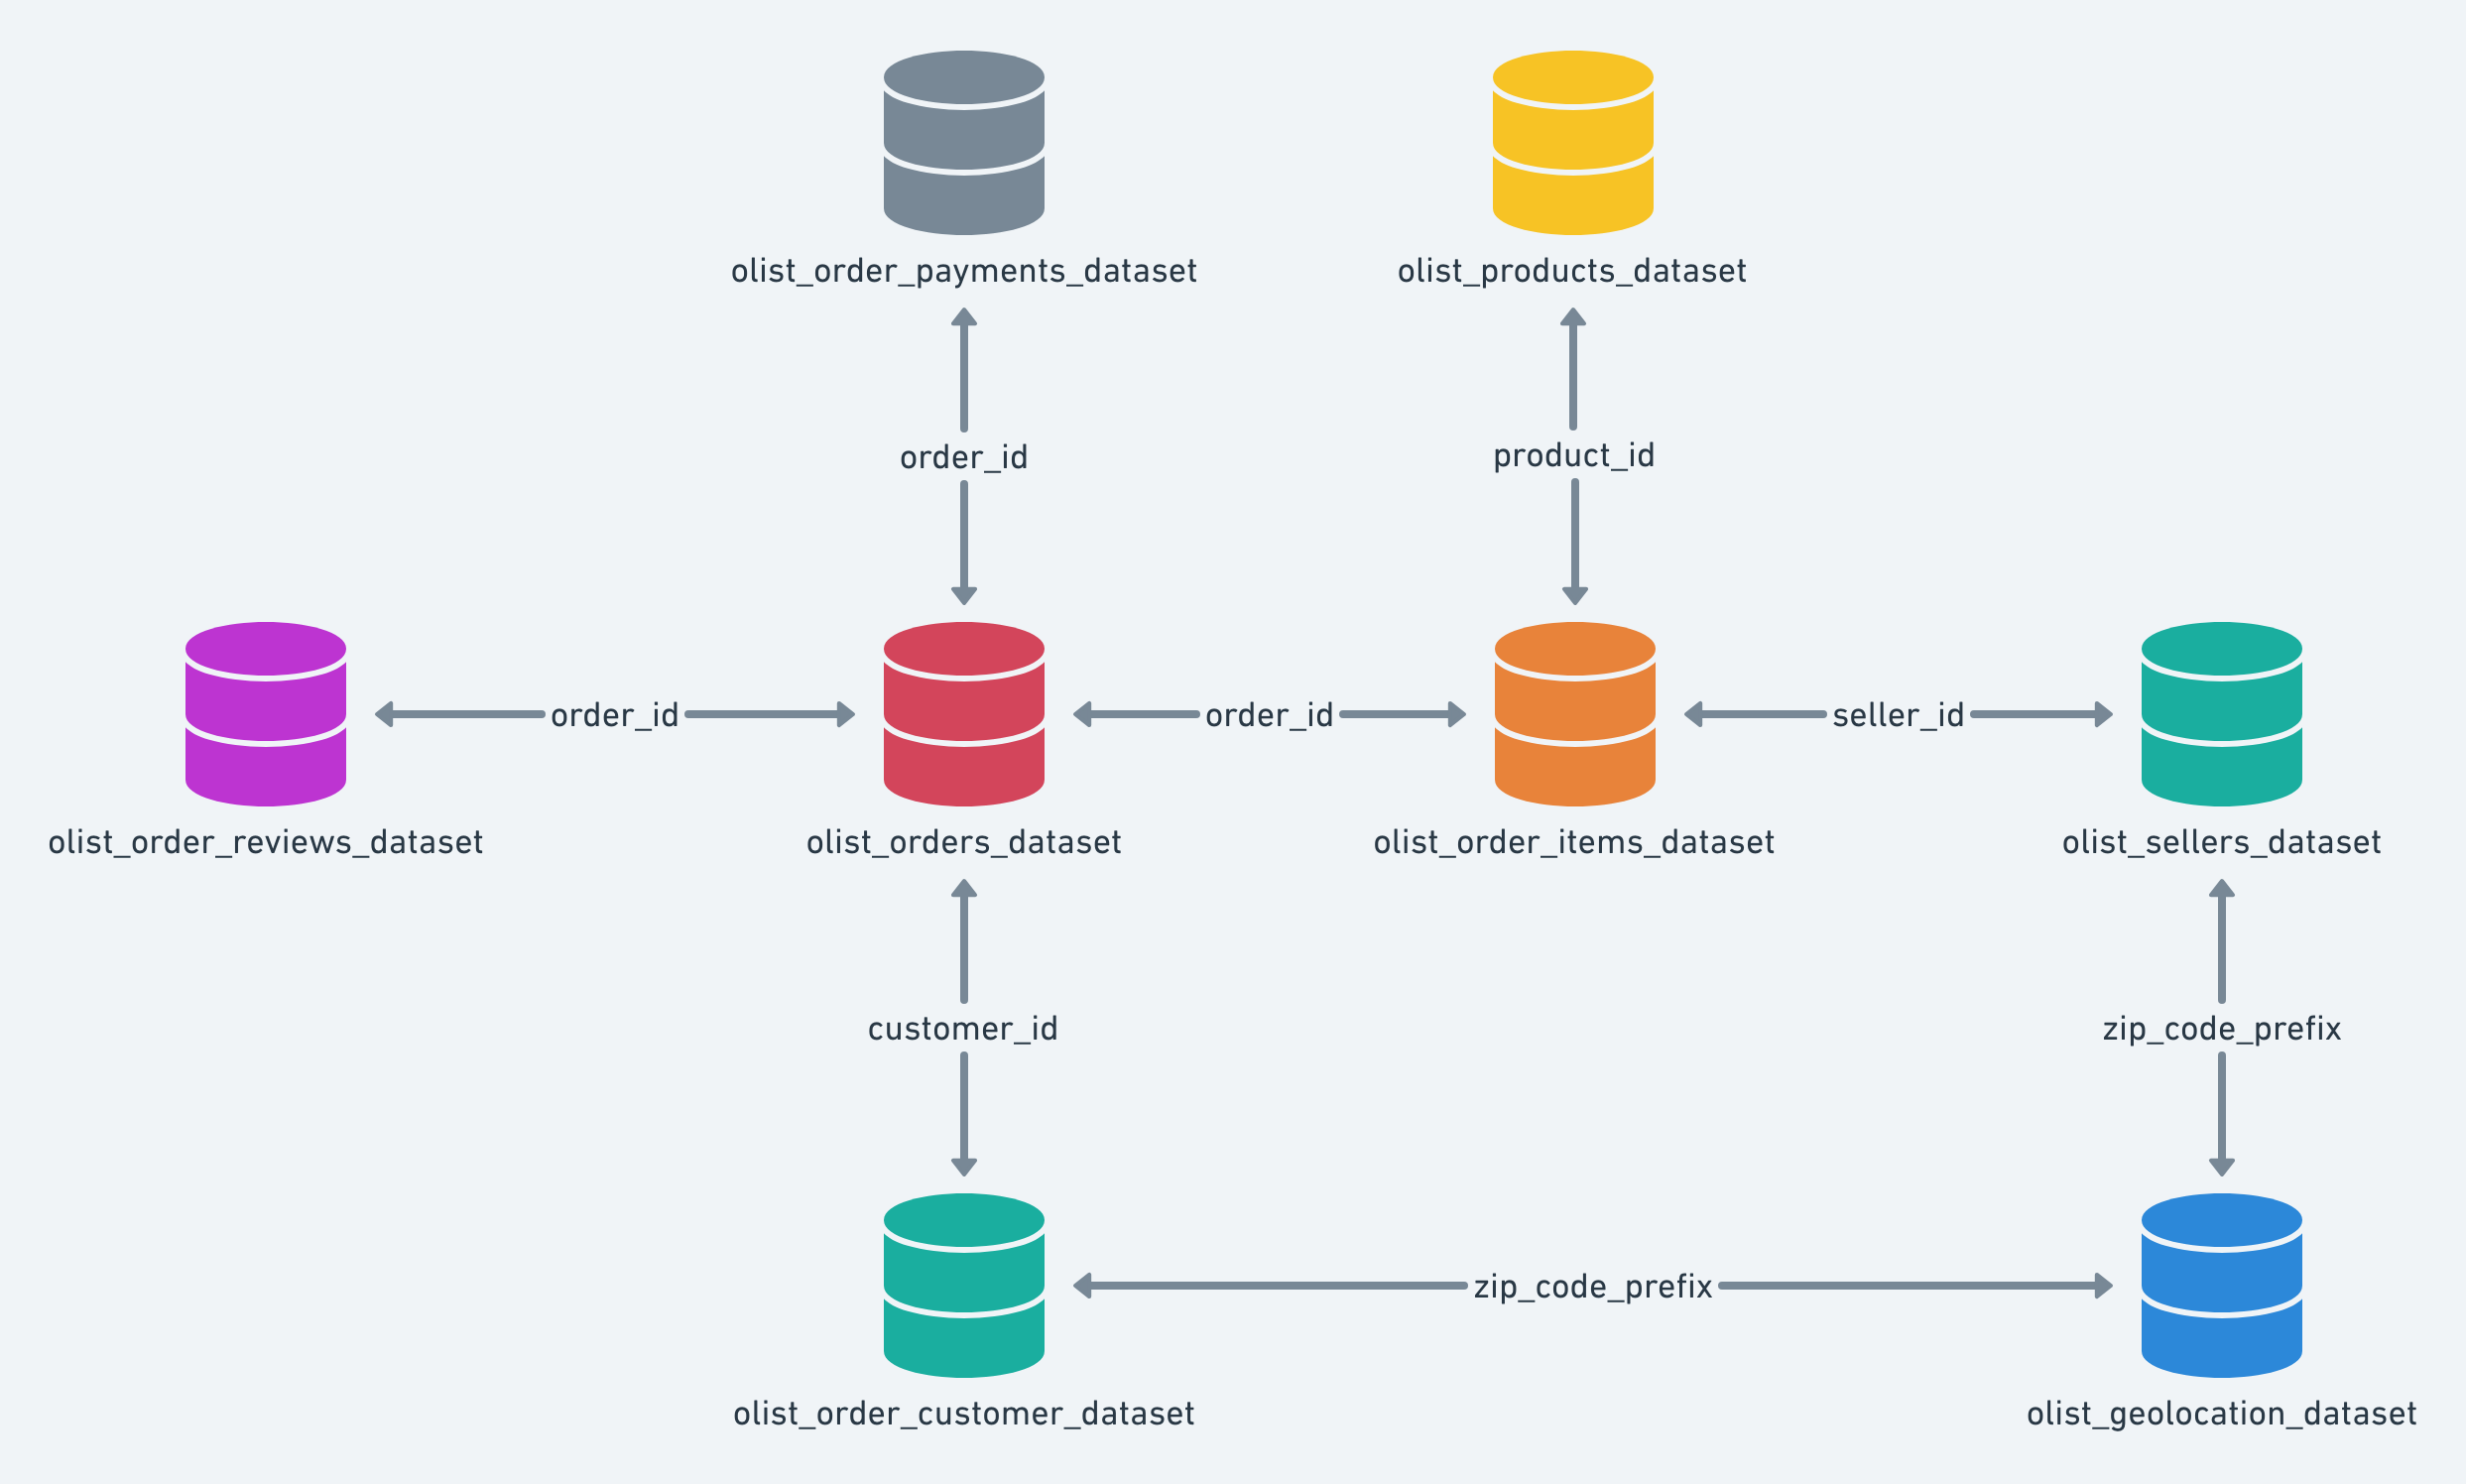

In [2]:
LIST_OF_FILES = ['olist_customers_dataset.csv',
'olist_geolocation_dataset.csv',
'olist_order_items_dataset.csv',
'olist_order_payments_dataset.csv',
'olist_order_reviews_dataset.csv',
'olist_orders_dataset.csv',
'olist_products_dataset.csv',
'olist_sellers_dataset.csv',
'product_category_name_translation.csv']

In [3]:
# Each dataset is stored into a position, accessible by its name as key
dict_dataset = {}

# Read all files
with ZipFile("archive.zip") as myzip:
    for file_name in LIST_OF_FILES:
        with myzip.open(file_name) as file:
            dict_dataset[file_name.split('.')[0]] = pd.read_csv(file, header=0, delimiter=",")

In [4]:
pd.Series(dict_dataset.keys())

0              olist_customers_dataset
1            olist_geolocation_dataset
2            olist_order_items_dataset
3         olist_order_payments_dataset
4          olist_order_reviews_dataset
5                 olist_orders_dataset
6               olist_products_dataset
7                olist_sellers_dataset
8    product_category_name_translation
dtype: object

# 1 Quantas linhas temos na tabela 'olist_orders_dataset.csv'? 

In [5]:
dict_dataset['olist_orders_dataset'].shape[0]

99441

# 2 Quantas linhas temos na tabela 'olist_order_items_dataset.csv'? 

In [6]:
dict_dataset['olist_order_items_dataset'].shape[0]

112650

# 3 Quantas linhas temos na tabela 'olist_customers_dataset.csv'? 

In [7]:
dict_dataset['olist_customers_dataset'].shape[0]

99441

# 4 Quantas linhas temos na tabela 'olist_sellers_dataset.csv'? 

In [8]:
dict_dataset['olist_sellers_dataset'].shape[0]

3095

# 5 Quantas linhas temos na tabela 'olist_products_dataset.csv'? 

In [9]:
dict_dataset['olist_products_dataset'].shape[0]

32951

# 6 Quantas linhas temos na tabela 'olist_order_payments_dataset.csv'? 

In [10]:
dict_dataset['olist_order_payments_dataset'].shape[0]

103886

# 7 Quantas linhas temos na tabela 'olist_order_reviews_dataset.csv'? 

In [11]:
dict_dataset['olist_order_reviews_dataset'].shape[0]

99224

# 8 Quantas linhas temos na tabela 'olist_geolocation_dataset.csv'? 

In [12]:
dict_dataset['olist_geolocation_dataset'].shape[0]

1000163

# 9 Quantos CEPS únicos temos no banco de dados? 

In [13]:
dict_dataset['olist_geolocation_dataset'].geolocation_zip_code_prefix.nunique()

19015

# 10 Quantas latitudes e longitudes estão expressas na base de dados? 

In [14]:
df = dict_dataset['olist_geolocation_dataset']

In [15]:
df.drop_duplicates(['geolocation_lat','geolocation_lng']).shape[0]

718463

# 11 Crie um método para agrupar todas as diferentes latitudes e longitudes que um determinado CEP possui para um valor único por CEP. Dica Use a função group_by e aggragate 

In [16]:
df = dict_dataset['olist_geolocation_dataset']

In [17]:
%%time
df['LAT_LONG'] = df.apply(lambda row :  str(row['geolocation_lat']) + str(row['geolocation_lng']), axis=1)

Wall time: 12.7 s


In [18]:
df_lat_long_in_CEPs = df.groupby('geolocation_zip_code_prefix').apply(lambda group : group['LAT_LONG'].nunique())

In [19]:
df_lat_long_in_CEPs =  df_lat_long_in_CEPs.rename('diff_lat_long').reset_index()

In [20]:
df_lat_long_in_CEPs.sort_values('diff_lat_long', ascending=False).head(10)

,geolocation_zip_code_prefix,diff_lat_long
9536,38400,746
4501,11680,727
8728,35500,726
4528,11740,666
9015,36400,627
9719,39400,620
8579,35162,611
9542,38408,600
9239,37200,595
8867,35900,589


In [21]:
df[df['geolocation_zip_code_prefix'] == 38400].head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,LAT_LONG
645450,38400,-18.915960,-48.278974,uberlandia,MG,-18.91595976602804-48.278974174995646
645456,38400,-18.900442,-48.260759,uberlandia,MG,-18.900442445467096-48.26075855813959
645460,38400,-18.913015,-48.262132,uberlandia,MG,-18.913015152374623-48.26213189982101
645461,38400,-18.922381,-48.282111,uberlandia,MG,-18.92238123980033-48.28211103081535
645471,38400,-18.922160,-48.271125,uberlandia,MG,-18.922160210658436-48.27112484984707


# 12 Crie um método para agregar todas as tabelas disponíveis em uma única tabela. 

In [22]:
LIST = []
for i in dict_dataset:
    LIST.append((i,dict_dataset[i].shape[0]))

In [23]:
pd.DataFrame(LIST, columns=['table', 'size']).sort_values('size', ascending=False)

,table,size
1,olist_geolocation_dataset,1000163
2,olist_order_items_dataset,112650
3,olist_order_payments_dataset,103886
0,olist_customers_dataset,99441
5,olist_orders_dataset,99441
4,olist_order_reviews_dataset,99224
6,olist_products_dataset,32951
7,olist_sellers_dataset,3095
8,product_category_name_translation,71


In [24]:
# olist_order_items_dataset

In [25]:
df_geolocation_dataset = dict_dataset['olist_geolocation_dataset']
df_orders_dataset = dict_dataset['olist_orders_dataset']
df_order_items_dataset = dict_dataset['olist_order_items_dataset']
df_order_payments_dataset = dict_dataset['olist_order_payments_dataset']
df_customers_dataset = dict_dataset['olist_customers_dataset']
df_order_reviews_dataset = dict_dataset['olist_order_reviews_dataset']
df_products_dataset = dict_dataset['olist_products_dataset']
df_sellers_dataset = dict_dataset['olist_sellers_dataset']
df_product_category_name_translation = dict_dataset['product_category_name_translation']

In [26]:
# <!-- ![backupPreview.png](attachment:backupPreview.png) -->

## A: order_items_dataset + products_dataset

In [27]:
A = df_order_items_dataset.merge(df_products_dataset, on='product_id', how='left')

In [28]:
A.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0


## B: sellers_dataset + geolocation_dataset

In [29]:
B = df_sellers_dataset.merge(df_geolocation_dataset.drop_duplicates('geolocation_zip_code_prefix'), how='left', left_on=['seller_zip_code_prefix'], right_on=['geolocation_zip_code_prefix'])

In [30]:
B.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,LAT_LONG
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023.0,-22.898536,-47.063125,campinas,SP,-22.898536428530225-47.063125168330544
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,13844.0,-22.382941,-46.946641,mogi-guacu,SP,-22.382941116125448-46.94664125419024


## C: A + B

In [31]:
C = A.merge(B, how='left', on='seller_id')

In [32]:
C.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,LAT_LONG
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,14.0,27277,volta redonda,SP,27277.0,-22.498183,-44.123614,volta redonda,RJ,-22.498182754371285-44.12361371579433
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,40.0,3471,sao paulo,SP,3471.0,-23.566258,-46.518417,sao paulo,SP,-23.56625832001269-46.51841724632121


## D: customer_dataset + geolocation_dataset

In [33]:
D = df_customers_dataset.merge(df_geolocation_dataset.drop_duplicates('geolocation_zip_code_prefix'), how='left', left_on=['customer_zip_code_prefix'], right_on=['geolocation_zip_code_prefix'])

## E: All left tables

In [34]:
E = df_orders_dataset.merge(df_order_payments_dataset, how='left', on='order_id') \
                 .merge(df_order_reviews_dataset, how='left', on='order_id') \
                 .merge(D, how='left', on='customer_id')

## FULL TABLE

In [35]:
df_full_table = E.merge(C, how='left', on='order_id')

# 13 Quantas ordens distintas temos em nosso banco de dados? 

In [36]:
df_full_table.order_id.nunique()

99441

# 14 Quantos clientes distintos existem em nosso banco de dados? 

In [37]:
df_full_table.customer_id.nunique()

99441

# 15 Quantos vendedores distintos existem em nosso bando de dados? 

In [38]:
df_full_table.seller_id.nunique()

3095

# 16 Qual a porcentagem de vendas feitas com cartão de crédito? 

In [39]:
porcentagem = round(df_full_table.payment_type.value_counts(normalize=True)['credit_card'] * 100, 2)
print(f'{porcentagem} %')

73.67 %


# 17 Qual a porcentagem de vendas feitas com cartão de débito? 

In [40]:
porcentagem = round(df_full_table.payment_type.value_counts(normalize=True)['debit_card'] * 100, 2)
print(f'{porcentagem} %')

1.43 %


# 18 Qual a porcentagem de reviews menor do que 2 estreles temos em nossa base? 

In [41]:
porcentagem = round((df_full_table.review_score.value_counts(normalize=True)[1.0] * 100), 2)
print(f'{porcentagem} %')

13.06 %


# 19 Quantas categorias de produto distintas existem em nossa base? 

In [42]:
df_full_table.product_category_name.nunique()

73

# 20 Qual a média de scores por categoria de produto? 

In [43]:
# [col for col in df_full_table.columns if 'com' in col]

In [44]:
df_full_table.groupby('product_category_name').agg({'review_score': 'mean'}).sort_values('review_score', ascending=False).head(10)

,review_score
product_category_name,
cds_dvds_musicais,4.642857
fashion_roupa_infanto_juvenil,4.500000
livros_interesse_geral,4.438503
flores,4.419355
livros_importados,4.419355
construcao_ferramentas_ferramentas,4.415842
livros_tecnicos,4.375465
alimentos_bebidas,4.324138
portateis_casa_forno_e_cafe,4.320513


# 21 Quais as 5 categorias que mais possuem produtos em nossa base? 

In [45]:
df_products_dataset.groupby('product_category_name').size().rename('qtd').reset_index().sort_values('qtd', ascending=False).head(5)

,product_category_name,qtd
13,cama_mesa_banho,3029
32,esporte_lazer,2867
54,moveis_decoracao,2657
11,beleza_saude,2444
72,utilidades_domesticas,2335


# 22 Quantos comentários existem na base? 

In [46]:
# TIRANDO AS COM CORPO DA MENSAGEM NULOS
df_order_reviews_dataset.review_comment_message.dropna().nunique()

36159

In [47]:
# TIRANDO AS COM TITULO DA MENSAGEM NULOS
df_order_reviews_dataset.review_comment_title.dropna().nunique()

4527

In [48]:
# TIRANDO AS COM TITULO E CORPO DA MENSAGEM NULOS
c1 = df_order_reviews_dataset.review_comment_message.isna() == False
c2 = df_order_reviews_dataset.review_comment_title.isna() == False
df_order_reviews_dataset[c1 & c2].shape[0]

9839

# 23 Crie uma nuvem de palavras que mostre as principais informações contidadas nos comentários. 

In [49]:
! pip install wordcloud

In [50]:
# importar os pacotes necessários
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [51]:
# FUNDE TODOS OS COMENTARIOS
ALL_COMMENTS = ', '.join(df_order_reviews_dataset.review_comment_message.dropna())

In [52]:
# ELIMINA PONTUACOES E TAGS INDESEJADAS
ALL_COMMENTS = ALL_COMMENTS.replace('\n','').replace('\r','').replace('.',' ').replace(',',' ').strip()

In [53]:
# REMOVE ESPACOS ADICIONAIS USANDO REGEX
import re
ALL_COMMENTS = re.sub(' +', ' ', ALL_COMMENTS)

In [54]:
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

In [55]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(ALL_COMMENTS)

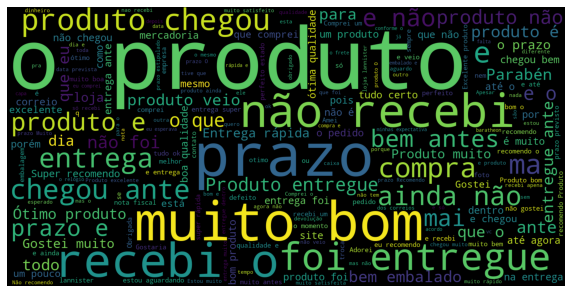

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")

# 24 Qual a porcentagem de ordens entregues? 

In [57]:
porcentagem = round(df_full_table.order_status.value_counts(normalize=True)['delivered'] * 100, 2)
print(f'{porcentagem} % das ordens foram entregues')

97.13 % das ordens foram entregues


# 25 Qual o tempo médio entre a compra e a aprovação da compra? 

In [58]:
# Somente um registro por compra
df_sem_duplicados = df_full_table.drop_duplicates('order_id')

In [59]:
df_sem_duplicados['order_purchase_timestamp'] = pd.to_datetime(df_sem_duplicados['order_purchase_timestamp'])

In [60]:
df_sem_duplicados['order_approved_at'] = pd.to_datetime(df_sem_duplicados['order_delivered_customer_date'])

In [61]:
df_sem_duplicados['atraso_pedido_aprov'] = df_sem_duplicados['order_approved_at'] - df_sem_duplicados['order_purchase_timestamp']

In [62]:
df_sem_duplicados.atraso_pedido_aprov.mean()

Timedelta('12 days 13:24:31.879068369')

# 26 Qual o tempo médio entre a compra e a entrega? 

In [63]:
df_sem_duplicados['order_delivered_customer_date'] = pd.to_datetime(df_sem_duplicados['order_delivered_customer_date'])

In [64]:
df_sem_duplicados['atraso_pedido_entrega'] = df_sem_duplicados['order_delivered_customer_date'] - df_sem_duplicados['order_purchase_timestamp']

In [65]:
df_sem_duplicados.atraso_pedido_entrega.mean()

Timedelta('12 days 13:24:31.879068369')

# 27 Qual a diferença média entre a data prevista de entrega e a data efetiva de entrega? 

# 28 Em qual período do dia as pessoas mais costumam fazer compras por estado? Divida entre manhã, tarde e noite. 

# 29 Quais os diferentes tipos de dados temos em nossa tabela? 

# 30 Quantos clientes distintos temos por estado? 

# 31 Quantos vendedores distintos temos por estado? 

# 32 Quantos clientes distintos temos na região metropolitana de São Paulo? 

# 33 Qual a média de valor, por estado, que os clientes atribuem aos vendedores? 

# 34 Qual o valor médio de frete cobrado por estado? 

# 35 Trace um histograma de preços divididos em 4 quantis. 

# 36 Trace um histograma de preços divididos em 10 quantis. 

# 37 Qual a porcentagem de vendas é feita no estado de São Paulo e estão no primeiro quartil? 

# 38 Qual o valor médio das compras no primeiro quantil? 

# 39 Considerando uma base de 6.000.000 de clientes na Olist, qual a quantidade de clientes no primeiro quartil e de São Paulo podemos atingir? 

# 40 Qual o TAM (Tamanho de Mercado) no contexto descrito anteriormente? 